Include source package

In [1]:
# switch to the project directory
%cd ..
# working directory should be ../FSE

c:\Users\admin\Desktop\research\pdi


In [2]:
import sys
import os
module_path = os.path.abspath('src')

if module_path not in sys.path:
    sys.path.append(module_path)

Load data

In [3]:
import pandas as pd
import numpy as np

from pdi.data.constants import INPUT_PATH, CSV_DELIMITER, MISSING_VALUES

data = pd.read_csv(INPUT_PATH, sep=CSV_DELIMITER, index_col=0)
for column, val in MISSING_VALUES.items():
    data.loc[data[column] == val, column] = np.NaN

Data shape

In [4]:
print(data.shape)

(2751934, 22)


Class distribution

In [5]:
classes = data["fPdgCode"].value_counts()
print(classes)

-211           1201576
 211           1199557
 321             93982
-321             90488
 2212            55748
-2212            50057
 11              21840
-11              20978
 13               8880
-13               8825
 1000010030          2
 1000010020          1
Name: fPdgCode, dtype: int64


Percent of classes used in experiments

In [6]:
chosen_classes=[-211, 211, 321, -321, 2212, -2212]

num_chosen = classes[chosen_classes].sum()
print(num_chosen / data.shape[0])

0.9780060132256079


Missing values

In [7]:
nulls = data.isnull().sum()
print(nulls)

fTPCSignal                  0
fTRDSignal            1047980
fTRDPattern           1047980
fTOFSignal            1692076
fBeta                 1692076
fP                          0
fPt                         0
fPx                         0
fPy                         0
fPz                         0
fSign                       0
fX                          0
fY                          0
fZ                          0
fAlpha                      0
fTrackType                  0
fTPCNClsShared              0
fDcaXY                      0
fDcaZ                       0
fPdgCode                    0
fIsPhysicalPrimary          0
P                           0
dtype: int64


Missing distribution pie chart

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[Index([], dtype='object'), Index(['fTRDSignal', 'fTRDPattern', 'fTOFSignal', 'fBeta'], dtype='object'), Index(['fTOFSignal', 'fBeta'], dtype='object'), Index(['fTRDSignal', 'fTRDPattern'], dtype='object')] [1021933 1010055  682021   37925]


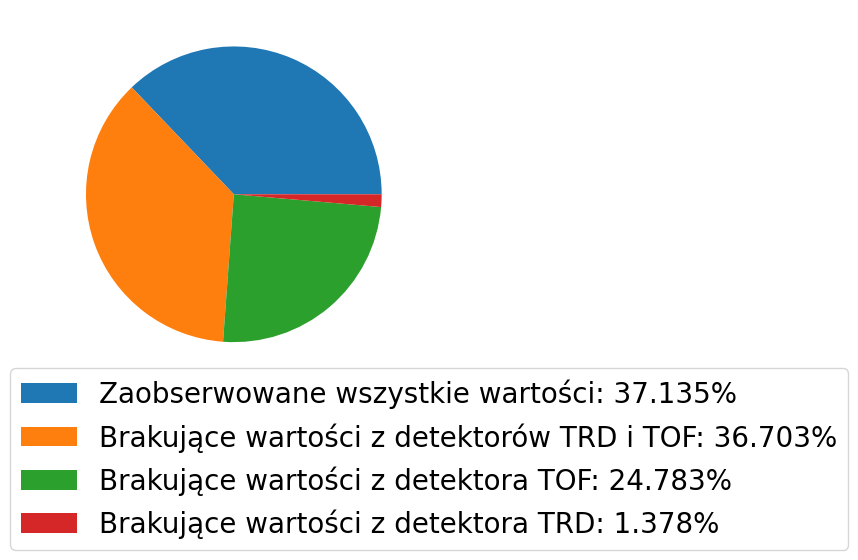

In [29]:
from matplotlib import pyplot as plt

null_rows = data.isnull().value_counts()

columns = data.columns
missing_values = [columns[list(index)] for index in null_rows.index]
print(missing_values, null_rows.values)

plt.pie(null_rows)

labels = ["Zaobserwowane wszystkie wartości",
    "Brakujące wartości z detektorów TRD i TOF",
    "Brakujące wartości z detektora TOF",
    "Brakujące wartości z detektora TRD"]
plt.legend(
    [l + f": {100*null_rows[i]/sum(null_rows):.3f}%" for i, l in enumerate(labels)]
    , loc="lower right", bbox_to_anchor=(2.2, -0.5), prop={'size': 20}
)

plt.savefig(f"reports/figures/miss_val_distr.eps", bbox_inches = "tight")

Percent of incomplete examples

In [9]:
all_nulls = data.isnull().any(axis=1).sum()
print(all_nulls)
print(all_nulls/data.shape[0])

1730001
0.6286491609173767


Class distribution pie chart

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


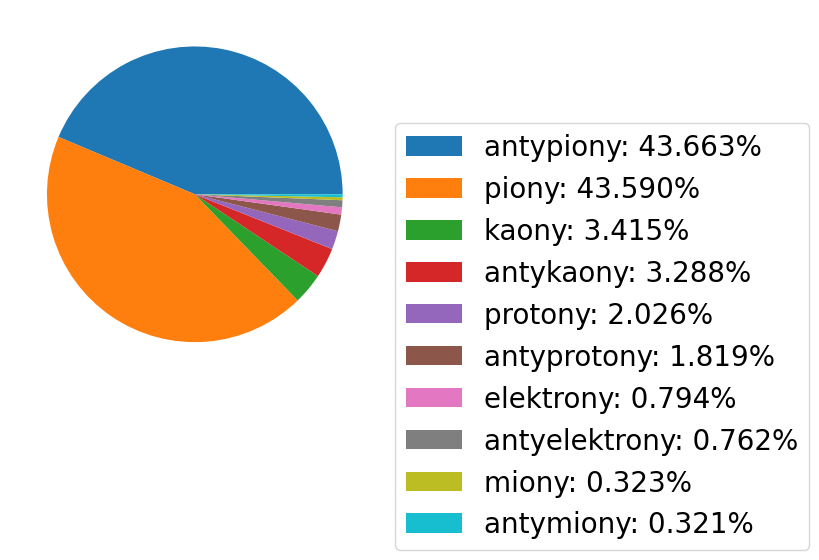

In [26]:
from pdi.constants import PARTICLES_DICT
particles = [classes[i] for i in classes.index if i in PARTICLES_DICT]
polish_labels_plural = {
    key: name.replace("anti", "anty").replace("electron", "elektron") + "y" for key, name in PARTICLES_DICT.items()
}

labels_percent = [
    polish_labels_plural[i] + f": {100*classes[i]/sum(classes):.3f}%" for i in classes.index if i in polish_labels_plural
]

plt.pie(particles)
plt.legend(
    labels_percent, loc="lower right", bbox_to_anchor=(2.2, -0.5), prop={'size': 20}
)

plt.savefig(f"reports/figures/part_type_distr.eps", bbox_inches = "tight")